In [6]:
%reload_ext memory_profiler
import autograd.numpy as anp

from memory_profiler import profile
import numpy as np

from qutip import (qsave,qload)
import matplotlib.pyplot as plt
from scipy.sparse import dia_matrix
%matplotlib inline

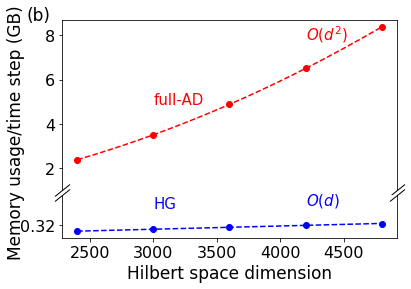

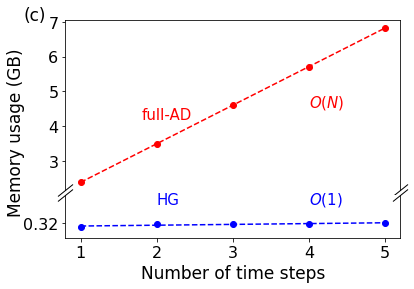

In [10]:
def plot_Nfixed(h_dim,N,memory_ma,memory_ad):
    x = (np.array(h_dim))
    fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True,gridspec_kw={'height_ratios': [4, 1]})
    fit = np.polyfit(x**2, memory_ad, 1)
    a=fit[0]
    b=fit[1]
    xx=np.linspace(2400,4800,200)
    y=a*np.power(xx**2,1)+b
    ax1.plot(xx,y,'--',color='red',label='full-AD')
    ax1.scatter(x,memory_ad,color='red')
    fit = np.polyfit(x, memory_ma, 1)
    a=fit[0]
    b=fit[1]
    y=a*np.power(xx,1)+b
    ax2.plot(xx,y,'--',color='blue',label='HG')
    ax2.scatter(x,memory_ma,color='blue')
    ax1.set_ylim(1,)  # 子图1设置y轴范围，只显示部分图
    ax2.set_ylim(0.316,0.329)  # 子图2设置y轴范围，只显示部分图
    ax1.spines['bottom'].set_visible(False)#关闭子图1中底部脊
    ax2.spines['top'].set_visible(False)##关闭子图2中顶部脊
    ax1.tick_params(bottom=False)
    ax2.set_ylabel('Memory usage/time step (GB)')
    ax2.set_xlabel('Hilbert space dimension')
    ax1.annotate('full-AD',
      xy     = (     x[1], memory_ad[1]),
      xytext = (x[1], 1.4*memory_ad[1]),
      color  = 'red',fontsize=15)
    ax2.annotate('HG',
      xy     = (     x[1], memory_ma[1]),
      xytext = (x[1], 1.02*memory_ma[1]),
      color  = 'blue',fontsize=15)
    ax1.annotate('$O(d^2)$',
      xy     = (     x[3], memory_ad[3]),
      xytext = (x[3], 1.2*memory_ad[3]),
      color  = 'red',fontsize=15)
    ax2.annotate('$O(d)$',
      xy     = (     x[3], memory_ma[3]),
      xytext = (x[3], 1.02*memory_ma[3]),
      color  = 'blue',fontsize=15)
    ax2.yaxis.set_label_coords(-0.11, 2.5)
    plt.subplots_adjust(hspace=.05)
    d = .8  #设置倾斜度
    #绘制断裂处的标记
    
    kwargs = dict(marker=[(-1, -d), (1, d)], markersize=15,
              linestyle='none', color='black', mec='black', mew=1, clip_on=False)
    ax1.plot([0, 1], [0, 0],transform=ax1.transAxes, **kwargs)
    ax2.plot([0, 1], [1, 1], transform=ax2.transAxes, **kwargs)
    ax1.xaxis.label.set_size(17)
    ax1.yaxis.label.set_size(17)
    ax2.xaxis.label.set_size(17)
    ax2.yaxis.label.set_size(17)
    ax1.tick_params(axis ='both', 
               labelsize = 16, )
    ax2.tick_params(axis ='both', 
               labelsize = 16, )
    ax2.yaxis.set_label_coords(-0.11, 2.5)
    y_lim=ax1.get_ylim()[1]
    ax1.text(2000, y_lim, '(b)',
        fontsize = 17)
    plt.yticks([0.32])
    plt.show()
    fig.savefig('state_memory_Nfixed.pdf',bbox_inches='tight')
    plt.close(fig)
N=40
h_dims=6*np.array([400,500,600,700,800])
state_ma_N=np.array([303.267578125, 303.8509765625, 304.5267578125, 304.9857421875, 305.528125])/953.674316
state_ad_N=np.array([2260.3765625,
 3340.93046875,
 4654.2978515625,
 6203.3021484375,
 7987.8857421875])/953.674316
plot_Nfixed(h_dims,N,state_ma_N,state_ad_N)

N_=[1,2,3,4,5]
h_dim=400
memory_ma=np.array([303.7806640625, 304.8041015625, 304.9421875, 304.9587890625, 304.97265625])/953.674316
memory_ad=np.array([2278.55,3335.89,4391.9,5444.97,6501.84])/953.674316
x = np.array(N_)
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True,gridspec_kw={'height_ratios': [4, 1]})
fit = np.polyfit(x, memory_ad, 1)
a=fit[0]
b=fit[1]
xx=np.linspace(1,5,200)
y=a*np.power(xx,1)+b
ax1.plot(xx,y,'--',color='red',label='full-AD')
ax1.scatter(x,memory_ad,color='red')
fit = np.polyfit(x, memory_ma, 1)
a=fit[0]
b=fit[1]
y=a*np.power(xx,1)+b
ax2.plot(xx,y,'--',color='blue',label='HG')
ax2.scatter(x,memory_ma,color='blue')
ax1.set_ylim()  # 子图1设置y轴范围，只显示部分图
ax2.set_ylim(0.3151,0.329)  # 子图2设置y轴范围，只显示部分图
ax1.spines['bottom'].set_visible(False)#关闭子图1中底部脊
ax2.spines['top'].set_visible(False)##关闭子图2中顶部脊
ax1.annotate('full-AD',
      xy     = (     x[1], memory_ad[1]),
      xytext = (x[1], 1.2*memory_ad[1]),
      color  = 'red',fontsize=15)
ax2.annotate('HG',
      xy     = (     x[1], memory_ma[1]),
      xytext = (x[1], 1.02*memory_ma[1]),
      color  = 'blue',fontsize=15)
ax1.annotate('$O(N)$',
      xy     = (     x[3], memory_ad[3]),
      xytext = (x[3], 0.8*memory_ad[3]),
      color  = 'red',fontsize=15)
ax2.annotate('$O(1)$',
      xy     = (     x[3], memory_ma[3]),
      xytext = (x[3], 1.02*memory_ma[3]),
      color  = 'blue',fontsize=15)
ax1.tick_params(bottom=False)
ax2.set_ylabel('Memory usage (GB)')
ax2.set_xlabel('Number of time steps')
ax1.xaxis.label.set_size(17)
ax1.yaxis.label.set_size(17)
ax2.xaxis.label.set_size(17)
ax2.yaxis.label.set_size(17)

ax1.tick_params(axis ='both', 
               labelsize = 16, )
ax2.tick_params(axis ='both', 
            labelsize = 16, )
ax2.yaxis.set_label_coords(-0.12, 2.5)
plt.yticks([0.32])
plt.subplots_adjust(hspace=.05)
d = .8  #设置倾斜度
    #绘制断裂处的标记
    
kwargs = dict(marker=[(-1, -d), (1, d)], markersize=15,
              linestyle='none', color='black', mec='black', mew=1, clip_on=False)
y_lim=ax1.get_ylim()[1]
ax1.text(0.25, y_lim, '(c)',
        fontsize = 17)
ax1.plot([0, 1], [0, 0],transform=ax1.transAxes, **kwargs)
ax2.plot([0, 1], [1, 1], transform=ax2.transAxes, **kwargs)
fig.savefig('state_memory_lfixed.pdf',bbox_inches='tight')
plt.show()

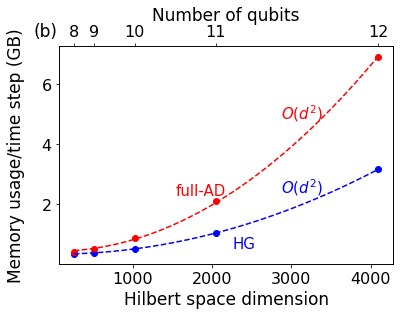

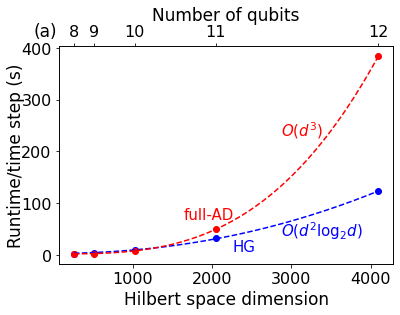

In [17]:
import numpy as np
dim=2**np.array([8,9,10,11,12])
time_ad=np.array([1.83,2.58,7.84,49.32,383.66])
time_ma=np.array([2.46,4.03,9.78,32.47,122.82])
mem_ma=np.array([314.9818359375, 348.471875, 481.9841796875, 978.210546875, 3010.7625])/953.674316
mem_ad=np.array([377.25,476.11,808.38,1997.17,6598.06])/(953.674316)

fig, ax1 = plt.subplots()

x = (np.array(dim))**1
fit = np.polyfit(dim**2, mem_ma, 1)
a=fit[0]
b=fit[1]
xx=np.linspace(2**8,2**12,200)
y=(a*np.power(xx,2)+b)
ax1.plot(xx, y, '--',color='blue', label = 'Manual')
ax1.scatter(x, mem_ma, color='blue')
ax1.annotate('HG',
      xy     = (     x[3], mem_ma[3]),
      xytext = (1.1*x[3], 0.5*mem_ma[3]),
      color  = 'blue',fontsize=15)
ax1.annotate('full-AD',
      xy     = (     x[3], mem_ad[3]),
      xytext = (0.75*x[3], 1.1*mem_ad[3]),
      color  = 'red',fontsize=15)
ax1.annotate('$O(d^2)$',
      xy     = (     x[4], mem_ma[4]),
      xytext = (0.7*x[4], 0.75*mem_ma[4]),
      color  = 'blue',fontsize=15)
ax1.annotate('$O(d^2)$',
      xy     = (     x[4], mem_ad[4]),
      xytext = (0.7*x[4], 0.7*mem_ad[4]),
      color  = 'red',fontsize=15)
#ax1.set_ylim(0.3,0.85)
fit = np.polyfit(dim**2, mem_ad, 1)
a=fit[0]
b=fit[1]
xx=np.linspace(2**8,2**12,200)
y=(a*np.power(xx,2)+b)
ax1.plot(xx, y,'--', color='red', label = 'Auto-grad')
ax1.scatter(x, mem_ad, color='red')
ax1.set_ylabel ( "Memory usage/time step (GB)")
ax1.set_xlabel ('Hilbert space dimension')

    

ax3 = ax1.twiny()
ax3.set_xlabel ('Number of qubits')
ax3.plot(2**np.array([8,9,10,11,12]),mem_ma,alpha=0)
plt.xticks([2**8,2**9,2**10,2**11,2**12], ["8", "9", "10","11","12"])
ax3.tick_params(axis ='both', 
               labelsize = 16, )
ax3.xaxis.label.set_size(17)
ax3.yaxis.label.set_size(17)
ax1.tick_params(axis ='both', 
               labelsize = 16, )
ax1.xaxis.label.set_size(17)
ax1.yaxis.label.set_size(17)

ax1.yaxis.set_label_coords(-0.10, 0.5)
y_lim=ax1.get_ylim()[1]+0.34
ax1.text(-250, y_lim, '(b)',
        fontsize = 17)
plt.show()
fig.savefig('gate_memory.pdf',bbox_inches='tight')




fig, ax2 = plt.subplots()
x=2**np.array([8,9,10,11,12])
fit = np.polyfit((x)**2, time_ma/np.array([8,9,10,11,12]), 1)
a=fit[0]
b=fit[1]
xx=np.linspace(2**8,2**12,200)
y=(a*np.power(xx**2,1)+b)
ax2.plot(xx, np.log2(xx)*y, '--',color='blue', label = 'Manual')
ax2.scatter(x, time_ma, color='blue')
ax2.annotate('$O(d^2$log$_2d)$',
      xy     = (     x[-1], time_ma[-1]),
      xytext = (0.7*x[-1], 0.3*time_ma[-1]),
      color  = 'blue',fontsize=15)
ax2.annotate('$O(d^3)$',
      xy     = (     x[-1], time_ad[-1]),
      xytext = (0.7*x[-1], 0.6*time_ad[-1]),
      color  = 'red',fontsize=15)
ax2.annotate('HG',
      xy     = (     x[3], time_ma[3]),
      xytext = (1.1*x[3], 0.2*time_ma[3]),
      color  = 'blue',fontsize=15)
ax2.annotate('full-AD',
      xy     = (     x[3], time_ad[3]),
      xytext = (0.8*x[3], 1.4*time_ad[3]),
      color  = 'red',fontsize=15)
fit = np.polyfit(x**3, time_ad, 1)
a=fit[0]
b=fit[1]
xx=np.linspace(4**4,8**4,200)
y=a*np.power(xx**3,1)+b
ax2.plot(xx, y,'--', color='red', label = 'Auto-grad')
ax2.scatter(x, time_ad, color='red')
ax2.set_ylabel ( "Runtime/time step (s)")
ax2.set_xlabel ('Hilbert space dimension')


ax2.xaxis.label.set_size(17)
ax2.yaxis.label.set_size(17)
ax2.tick_params(axis ='both', 
           labelsize = 16, )
ax3 = ax2.twiny()
ax3.set_xlabel ('Number of qubits')
ax3.scatter(2**np.array([8,9,10,11,12]),time_ad,alpha=0)
plt.xticks([2**8,2**9,2**10,2**11,2**12], ["8", "9", "10","11","12"])

ax3.tick_params(axis ='both', 
               labelsize = 16, )
ax3.xaxis.label.set_size(17)
ax3.yaxis.label.set_size(17)
ax2.yaxis.set_label_coords(-0.10, 0.5) 
y_lim=ax3.get_ylim()[1]+20
ax2.text(-250, y_lim, '(a)',
        fontsize = 17)
plt.show()
fig.savefig('gate_time.pdf',bbox_inches='tight')
    


6.0 4.0


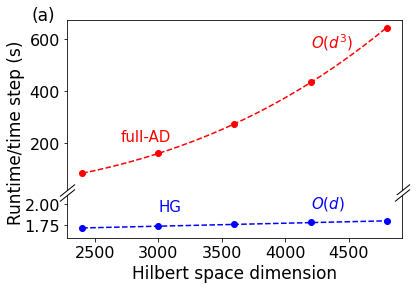

In [13]:
def plot_time(dim,memory_ma,memory_ad):
    x=np.array(dim)**1
    fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True,gridspec_kw={'height_ratios': [4, 1]})
    fit = np.polyfit(dim**3, memory_ad, 1)
    a=fit[0]
    b=fit[1]
    xx=np.linspace(2400,4800,200)
    y=a*np.power(xx,3)+b
    ax1.plot(xx,y,'--',color='red',label='full-AD')
    ax1.scatter(x,memory_ad,color='red')
    fit = np.polyfit(dim, memory_ma, 1)
    a=fit[0]
    b=fit[1]
    y=a*np.power(xx,1)+b
    ax2.plot(xx,y,'--',color='blue',label='HG')
    ax2.scatter(x,memory_ma,color='blue')
    ax1.spines['bottom'].set_visible(False)#关闭子图1中底部脊
    ax2.spines['top'].set_visible(False)##关闭子图2中顶部脊
    ax1.tick_params(bottom=False)
    ax1.annotate('full-AD',
      xy     = (     x[1], memory_ad[1]),
      xytext = (0.9*x[1], 1.3*memory_ad[1]),
      color  = 'red',fontsize=15)
    ax2.annotate('HG',
      xy     = (     x[1], memory_ma[1]),
      xytext = (x[1], 1.1*memory_ma[1]),
      color  = 'blue',fontsize=15)
    ax1.annotate('$O(d^3)$',
      xy     = (     x[3], memory_ad[3]),
      xytext = (x[3], 1.3*memory_ad[3]),
      color  = 'red',fontsize=15)
    ax2.annotate('$O(d)$',
      xy     = (     x[3], memory_ma[3]),
      xytext = (x[3], 1.1*memory_ma[3]),
      color  = 'blue',fontsize=15)
    ax2.set_ylim(1.6,2.1)
    ax1.set_ylim(20,)
    ax2.set_ylabel('Runtime/time step (s)')
    ax2.set_xlabel('Hilbert space dimension')
    plt.subplots_adjust(hspace=.05)
    d = .8  #设置倾斜度
    #绘制断裂处的标记
    
    kwargs = dict(marker=[(-1, -d), (1, d)], markersize=15,
              linestyle='none', color='black', mec='black', mew=1, clip_on=False)
    ax1.plot([0, 1], [0, 0],transform=ax1.transAxes, **kwargs)
    ax2.plot([0, 1], [1, 1], transform=ax2.transAxes, **kwargs)
    
    ax1.xaxis.label.set_size(17)
    ax1.yaxis.label.set_size(17)
    ax2.xaxis.label.set_size(17)
    ax2.yaxis.label.set_size(17)
    ax1.tick_params(axis ='both', 
               labelsize = 16, )
    ax2.tick_params(axis ='both', 
               labelsize = 16, )
    ax2.yaxis.set_label_coords(-0.125, 2.5)
    y_lim=ax1.get_ylim()[1]
    ax1.text(2000, y_lim, '(a)',
        fontsize = 17)
    plt.savefig('stat_time.pdf',bbox_inches='tight')
    fig_width, fig_height = plt.gcf().get_size_inches()
    print(fig_width, fig_height)
    plt.show()
dim=6*np.array([400,500,600,700,800])
time_ad=np.array([84.36, 160.55, 272.58,434.08, 641.72])

time_ma=np.array([1.7120000000000002, 1.7384999999999997, 1.7615000000000003, 1.7825, 1.7950000000000004]

)
plot_time(dim,time_ma,time_ad)


In [5]:
np.array([26.873, 47.3305, 77.84,119.97850000000001, 175.30400000000003])/np.array([84.36, 160.55, 270.58,427.08, 641.72])


array([0.31855145, 0.29480224, 0.28767832, 0.28092746, 0.27317833])